#***SEMOS***

In [4]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#8:1:1

In [5]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 8:1:1
df = pd.read_csv('/content/BNB.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1523
Test data size: 380


In [6]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [8]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 184.84817671277625
Testing RMSE: 202.1579668853545
Testing MAPE: 0.3818119854910585


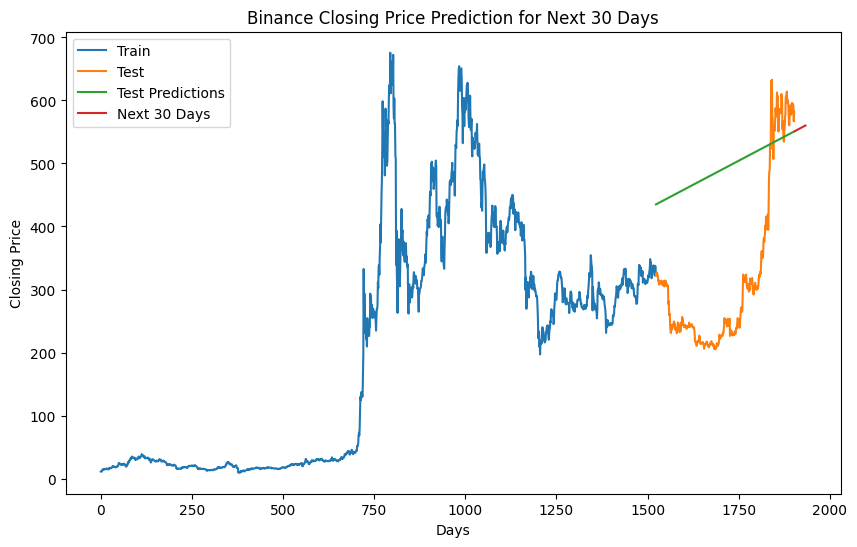

Predicted closing prices for the next 30 days:
[551.33899316 551.64412158 551.94925    552.25437842 552.55950684
 552.86463526 553.16976368 553.4748921  553.78002052 554.08514894
 554.39027736 554.69540578 555.0005342  555.30566262 555.61079104
 555.91591946 556.22104788 556.5261763  556.83130472 557.13643314
 557.44156156 557.74668998 558.0518184  558.35694682 558.66207524
 558.96720366 559.27233208 559.5774605  559.88258892 560.18771734]


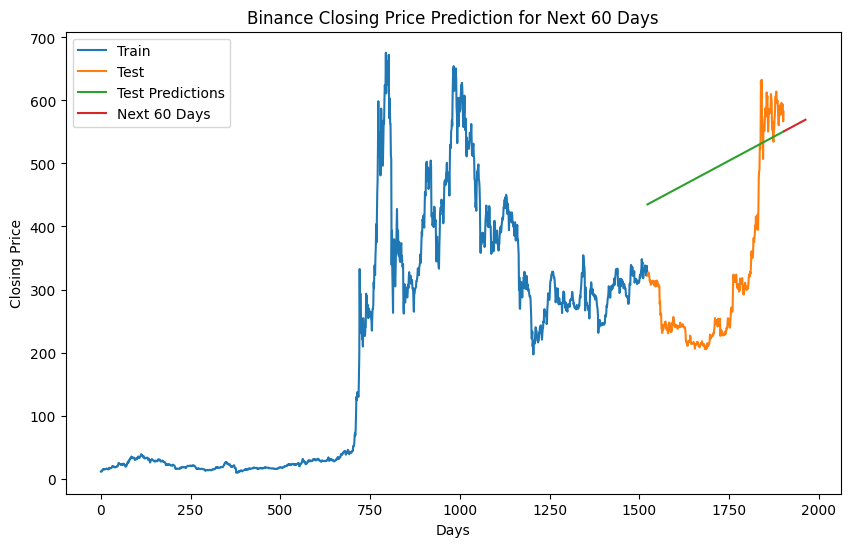

Predicted closing prices for the next 60 days:
[551.33899316 551.64412158 551.94925    552.25437842 552.55950684
 552.86463526 553.16976368 553.4748921  553.78002052 554.08514894
 554.39027736 554.69540578 555.0005342  555.30566262 555.61079104
 555.91591946 556.22104788 556.5261763  556.83130472 557.13643314
 557.44156156 557.74668998 558.0518184  558.35694682 558.66207524
 558.96720366 559.27233208 559.5774605  559.88258892 560.18771734
 560.49284576 560.79797418 561.1031026  561.40823102 561.71335944
 562.01848786 562.32361628 562.6287447  562.93387312 563.23900154
 563.54412996 563.84925838 564.1543868  564.45951522 564.76464364
 565.06977206 565.37490048 565.6800289  565.98515732 566.29028574
 566.59541416 566.90054258 567.205671   567.51079942 567.81592784
 568.12105626 568.42618468 568.7313131  569.03644152 569.34156994]


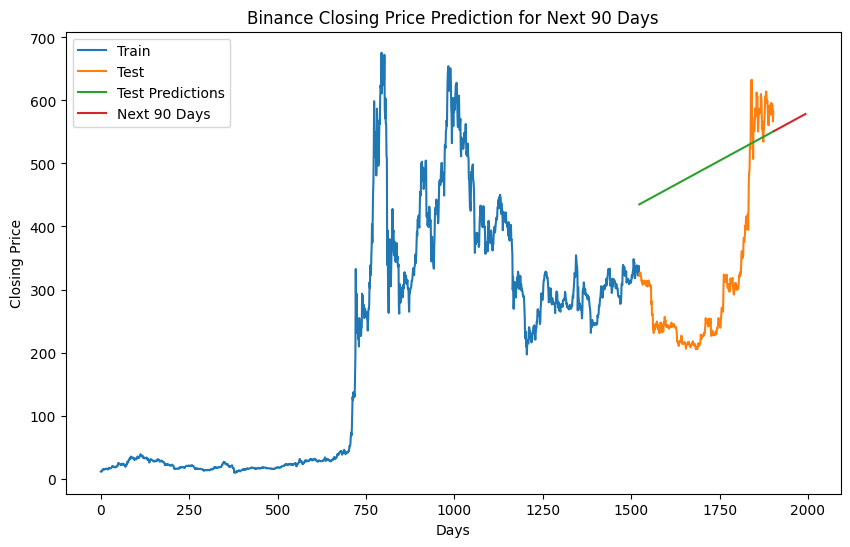

Predicted closing prices for the next 90 days:
[551.33899316 551.64412158 551.94925    552.25437842 552.55950684
 552.86463526 553.16976368 553.4748921  553.78002052 554.08514894
 554.39027736 554.69540578 555.0005342  555.30566262 555.61079104
 555.91591946 556.22104788 556.5261763  556.83130472 557.13643314
 557.44156156 557.74668998 558.0518184  558.35694682 558.66207524
 558.96720366 559.27233208 559.5774605  559.88258892 560.18771734
 560.49284576 560.79797418 561.1031026  561.40823102 561.71335944
 562.01848786 562.32361628 562.6287447  562.93387312 563.23900154
 563.54412996 563.84925838 564.1543868  564.45951522 564.76464364
 565.06977206 565.37490048 565.6800289  565.98515732 566.29028574
 566.59541416 566.90054258 567.205671   567.51079942 567.81592784
 568.12105626 568.42618468 568.7313131  569.03644152 569.34156994
 569.64669836 569.95182678 570.2569552  570.56208362 570.86721204
 571.17234046 571.47746888 571.7825973  572.08772572 572.39285414
 572.69798256 573.00311098 57

In [9]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

#7:2:1

In [10]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('/content/BNB.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1332
Test data size: 571


In [11]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [13]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 240.25175407560485
Testing RMSE: 258.1576992746646
Testing MAPE: 0.43531048365734


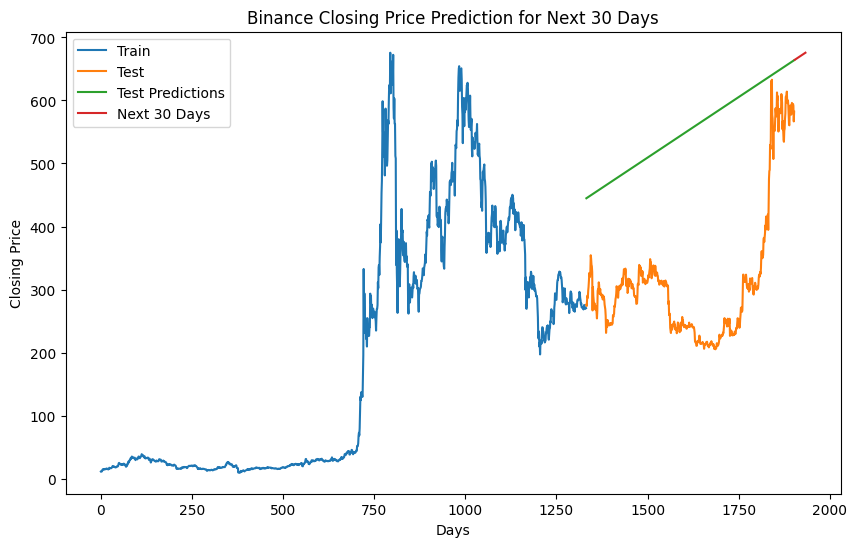

Predicted closing prices for the next 30 days:
[664.55034977 664.9345243  665.31869883 665.70287336 666.08704789
 666.47122242 666.85539695 667.23957148 667.62374601 668.00792054
 668.39209507 668.7762696  669.16044413 669.54461866 669.92879319
 670.31296772 670.69714225 671.08131678 671.4654913  671.84966583
 672.23384036 672.61801489 673.00218942 673.38636395 673.77053848
 674.15471301 674.53888754 674.92306207 675.3072366  675.69141113]


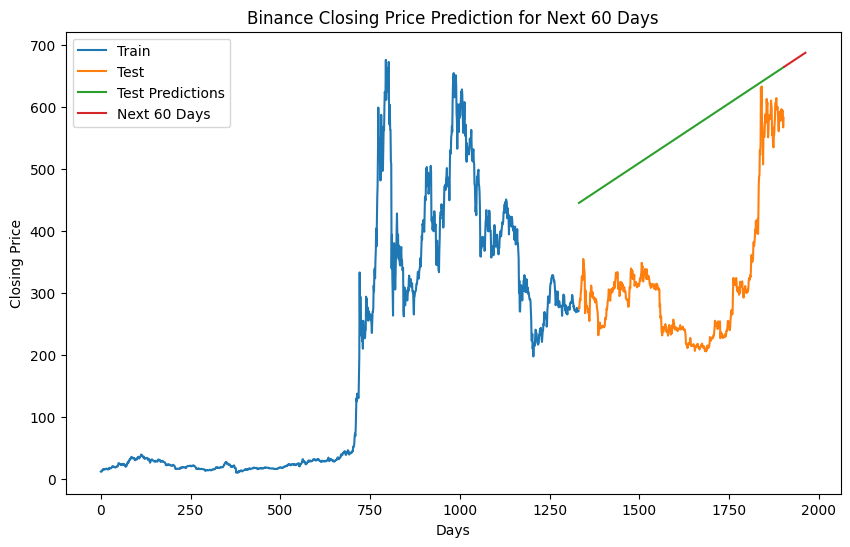

Predicted closing prices for the next 60 days:
[664.55034977 664.9345243  665.31869883 665.70287336 666.08704789
 666.47122242 666.85539695 667.23957148 667.62374601 668.00792054
 668.39209507 668.7762696  669.16044413 669.54461866 669.92879319
 670.31296772 670.69714225 671.08131678 671.4654913  671.84966583
 672.23384036 672.61801489 673.00218942 673.38636395 673.77053848
 674.15471301 674.53888754 674.92306207 675.3072366  675.69141113
 676.07558566 676.45976019 676.84393472 677.22810925 677.61228378
 677.99645831 678.38063284 678.76480737 679.1489819  679.53315643
 679.91733096 680.30150549 680.68568002 681.06985455 681.45402907
 681.8382036  682.22237813 682.60655266 682.99072719 683.37490172
 683.75907625 684.14325078 684.52742531 684.91159984 685.29577437
 685.6799489  686.06412343 686.44829796 686.83247249 687.21664702]


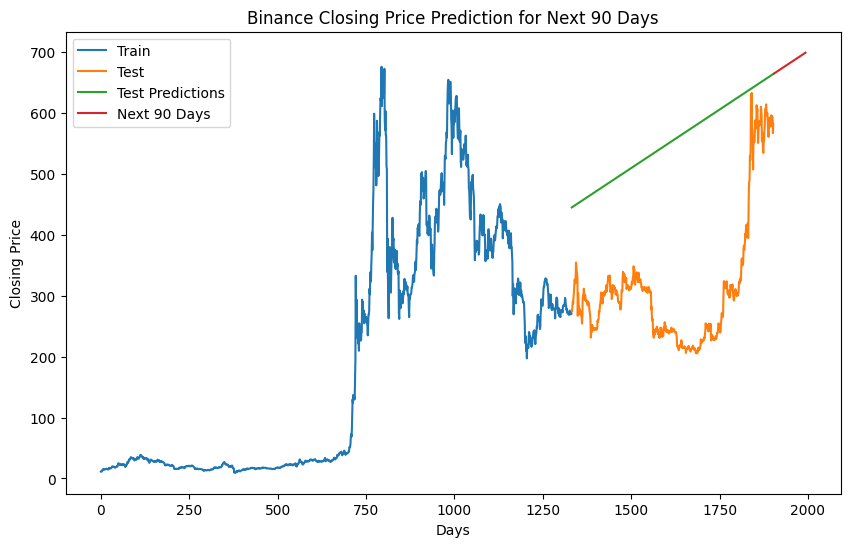

Predicted closing prices for the next 90 days:
[664.55034977 664.9345243  665.31869883 665.70287336 666.08704789
 666.47122242 666.85539695 667.23957148 667.62374601 668.00792054
 668.39209507 668.7762696  669.16044413 669.54461866 669.92879319
 670.31296772 670.69714225 671.08131678 671.4654913  671.84966583
 672.23384036 672.61801489 673.00218942 673.38636395 673.77053848
 674.15471301 674.53888754 674.92306207 675.3072366  675.69141113
 676.07558566 676.45976019 676.84393472 677.22810925 677.61228378
 677.99645831 678.38063284 678.76480737 679.1489819  679.53315643
 679.91733096 680.30150549 680.68568002 681.06985455 681.45402907
 681.8382036  682.22237813 682.60655266 682.99072719 683.37490172
 683.75907625 684.14325078 684.52742531 684.91159984 685.29577437
 685.6799489  686.06412343 686.44829796 686.83247249 687.21664702
 687.60082155 687.98499608 688.36917061 688.75334514 689.13751967
 689.5216942  689.90586873 690.29004326 690.67421779 691.05839232
 691.44256684 691.82674137 69

In [14]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

#6:2:2

In [15]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 6:2:2
df = pd.read_csv('/content/BNB.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1142
Test data size: 761


In [16]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [18]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 346.97624494402476
Testing RMSE: 366.3656128870451
Testing MAPE: 0.5227895608245483


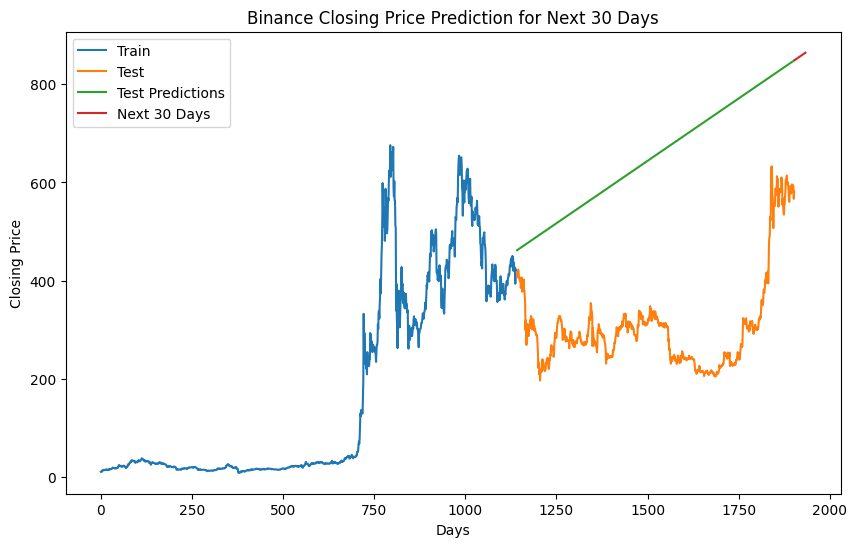

Predicted closing prices for the next 30 days:
[849.0843829  849.5922386  850.10009429 850.60794999 851.11580569
 851.62366138 852.13151708 852.63937278 853.14722847 853.65508417
 854.16293987 854.67079557 855.17865126 855.68650696 856.19436266
 856.70221835 857.21007405 857.71792975 858.22578544 858.73364114
 859.24149684 859.74935254 860.25720823 860.76506393 861.27291963
 861.78077532 862.28863102 862.79648672 863.30434241 863.81219811]


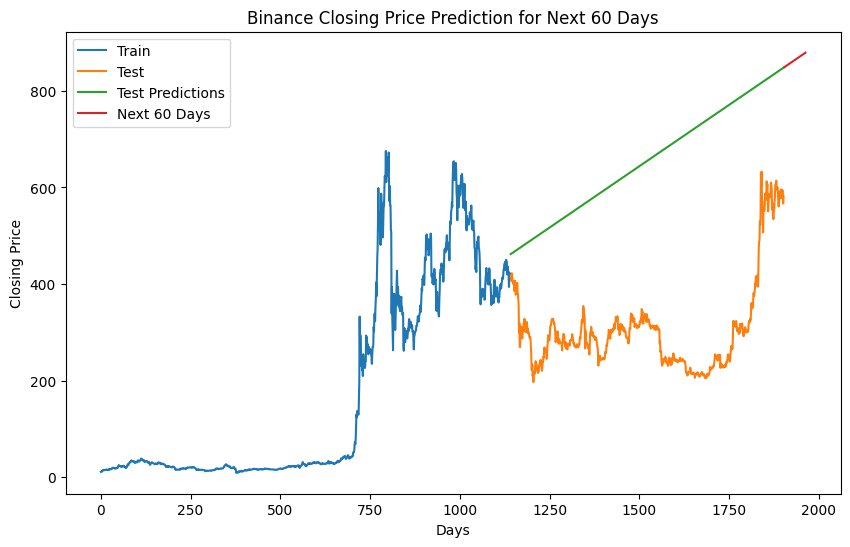

Predicted closing prices for the next 60 days:
[849.0843829  849.5922386  850.10009429 850.60794999 851.11580569
 851.62366138 852.13151708 852.63937278 853.14722847 853.65508417
 854.16293987 854.67079557 855.17865126 855.68650696 856.19436266
 856.70221835 857.21007405 857.71792975 858.22578544 858.73364114
 859.24149684 859.74935254 860.25720823 860.76506393 861.27291963
 861.78077532 862.28863102 862.79648672 863.30434241 863.81219811
 864.32005381 864.82790951 865.3357652  865.8436209  866.3514766
 866.85933229 867.36718799 867.87504369 868.38289938 868.89075508
 869.39861078 869.90646647 870.41432217 870.92217787 871.43003357
 871.93788926 872.44574496 872.95360066 873.46145635 873.96931205
 874.47716775 874.98502344 875.49287914 876.00073484 876.50859054
 877.01644623 877.52430193 878.03215763 878.54001332 879.04786902]


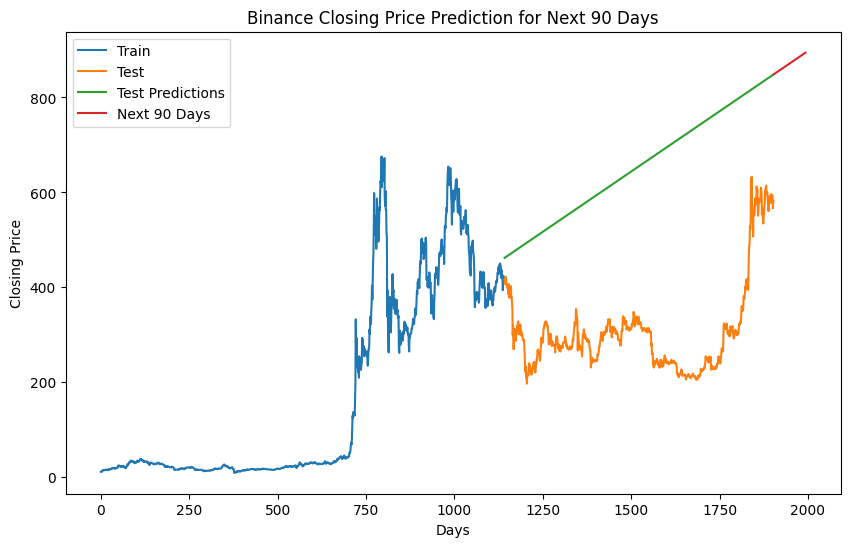

Predicted closing prices for the next 90 days:
[849.0843829  849.5922386  850.10009429 850.60794999 851.11580569
 851.62366138 852.13151708 852.63937278 853.14722847 853.65508417
 854.16293987 854.67079557 855.17865126 855.68650696 856.19436266
 856.70221835 857.21007405 857.71792975 858.22578544 858.73364114
 859.24149684 859.74935254 860.25720823 860.76506393 861.27291963
 861.78077532 862.28863102 862.79648672 863.30434241 863.81219811
 864.32005381 864.82790951 865.3357652  865.8436209  866.3514766
 866.85933229 867.36718799 867.87504369 868.38289938 868.89075508
 869.39861078 869.90646647 870.41432217 870.92217787 871.43003357
 871.93788926 872.44574496 872.95360066 873.46145635 873.96931205
 874.47716775 874.98502344 875.49287914 876.00073484 876.50859054
 877.01644623 877.52430193 878.03215763 878.54001332 879.04786902
 879.55572472 880.06358041 880.57143611 881.07929181 881.58714751
 882.0950032  882.6028589  883.1107146  883.61857029 884.12642599
 884.63428169 885.14213738 885

In [19]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)